# IMDB Training a neural network report

## Table Of Contents:
1. [Introduction](#1)
2. [The universal workflow of machine learning](#2) 
    1. [Defining the problem and assembling a dataset](#wf-1)
        1. [Loading the IMDB dataset](#2Aa) 
        1. [Visualizing the dataset](#2Ab) 
    2. [Choosing a measure of success](#wf-2) 
    3. [Deciding on an evaluation protocol](#wf-3) 
    4. [Preparing your data](#wf-4) 
    5. [Developing a model that does better than a baseline](#wf-5)
        1. [Baseline Model](#2Ea) 
        2. [Evaluation of the testing data with the baseline model ](#2Eb) 
        3. [Results](#2Ec) 
    6. [Scaling up: developing a model that overfits](#wf-6) 
        1. [Model One](#m-1) 
        2. [Model Two](#m-2) 
        3. [Model Three](#m-3) 
        4. [Model Four](#m-4) 
    7. [Regularizing your model and tuning your hyperparameters](#wf-7) 
        1. [Model five](#m-5) 
        2. [Model six](#m-6) 
        3. [Model seven](#m-7) 
3. [Comparison between the top two models](#3) 
    1. [Neural Network from Model 4](#3A) 
    2. [Neural Network from Model 7](#3B) 
4. [Results](#4) 
5. [Evaluation](#5) 
6. [Conclusion](#6) 
7. [References](#7) 
8. [Modular Code](#8) 
    1. [Imports](#8A)
    1. [Decode a review](#8B)
    2. [Vectorize Sequences](#8C)
    3. [Plot Training and validation loss ](#8D)
    4. [Plot Training and validation accuracy ](#8E)
    1. [Plot validation loss A vs B](#8F)
    1. [Plot validation accuracy A vs B](#8G)
    1. [Model one code](#8H)
    1. [Model two code](#8I)
    1. [Model three code](#8J)
    1. [Model four code](#8K)
    1. [Model five code](#8L)
    1. [Model six code](#8M)
    1. [Model seven code](#8N)

## 1. Introduction <a class="anchor" id="1"></a>

The IMDB dataset, a publicly available collection of movie reviews, has been extensively utilized in machine learning research endeavors. In line with this tradition, this report will delve into the methodologies and analyses required to construct a Neural Network utilizing Deep Learning. Drawing inspiration from the workflow outlined in the book "Deep Learning with Python," this report will navigate through the intricacies of algorithm creation, optimization techniques, and exploration of various hyperparameters. Subsequently, a thorough examination of the best two models will be conducted, shedding light on the strengths and weaknesses inherent in this workflow.

## 2. The universal workflow of machine learning <a class="anchor" id="2"></a>

### 2.A Defining the problem and assembling a dataset <a class="anchor" id="wf-1"></a>

This report aims to develop a deep neural network designed to classify the sentiment of movie reviews as either positive or negative, thus framing the problem as a binary classification task. The IMDB dataset is chosen as an ideal candidate for this study due to its comprehensive collection of 50,000 movie reviews. The dataset is readily available within the Keras framework, and the `load_data(num_words=testSampleSize)` method simplifies the preprocessing of the dataset by performing the following steps:

- Each review is represented as a sequence of word indices, where each word in the review is mapped to a unique integer index.

- The most frequently occurring words are selected to create a vocabulary of a specified size. Words outside this vocabulary are discarded or replaced with a special token.

- We specify `num_words=10000` to limit the vocabulary size to the 10,000 most frequently occurring words in the dataset.

- The dataset is split into training and testing sets. By default, the split ratio is 50% for training and 50% for testing.

- The sentiment labels associated with each review are encoded as integers: 0 for negative reviews and 1 for positive reviews.

- The function returns two tuples:

    - `(train_data, train_labels)`: Training data and labels, shape Vector.
    - `(test_data, test_labels)`: Testing data and labels, shape Vector.



#### 2.A.a Loading the IMDB dataset <a class="anchor" id="2Aa"></a>

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


#### 2.A.b Visualizing the dataset <a class="anchor" id="2Ab"></a>

In [6]:
# Display the shape of the training and testing datasets
print("Training data shape:", train_data.shape)
print("Training labels shape:", train_labels.shape)
print("Testing data shape:", test_data.shape)
print("Testing labels shape:", test_labels.shape)

# Display a sample review and its corresponding label
print("\nSample review:", train_data[0])  # The review is represented as a list of word indices
print("\nSample english review:", decode_review(train_data[0]))
print("\nSample label:", train_labels[0])  # 0 indicates a negative review, 1 indicates a positive review

Training data shape: (25000,)
Training labels shape: (25000,)
Testing data shape: (25000,)
Testing labels shape: (25000,)

Sample review: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38,

### 2.B Choosing a measure of success <a class="anchor" id="wf-2"></a>

Selecting **accuracy** as the measure of success for the IMDB dataset, where the goal is to classify movie reviews as either positive or negative sentiment, is crucial for several reasons. Firstly, accuracy provides a straightforward and intuitive understanding of the model's overall performance by measuring the proportion of correctly classified reviews out of the total number of reviews. This metric is particularly relevant in binary classification tasks where the goal is to achieve the highest possible percentage of correct predictions across both positive and negative classes. Additionally, accuracy is well-suited for evaluating the model's generalization ability, as it considers both true positives and true negatives without favoring either class. By prioritizing accuracy as the primary measure of success, I am opting for a balanced assessment of the model's effectiveness, rather than focusing solely on precision and recall, or the F1-score, which may prioritize specific aspects of the model's performance over others.

### 2.C Deciding on an evaluation protocol <a class="anchor" id="wf-3"></a>

For the IMDB dataset, which contains a substantial amount of data (50,000 movie reviews), maintaining a **hold-out validation** set would be an appropriate evaluation protocol. This approach involves splitting the dataset into a training set and a validation set, with the training set used to train the model and the validation set used to evaluate its performance.

Since the dataset is sufficiently large, this protocol allows for reliable evaluation without the need for more computationally expensive techniques like K-fold cross-validation or iterated K-fold validation. Therefore, maintaining a hold-out validation set would be a practical and effective choice for evaluating models trained on the IMDB dataset.

### 2.D Preparing your data <a class="anchor" id="wf-4"></a>

In preparation for training a deep neural network, the data undergoes formatting to ensure compatibility with the model architecture. This involves transforming the raw data into a structured format known as a Tensor, which serves as the fundamental data structure for input into neural networks. Since we are planning to utilize a Dense layer in our neural network, it requires input data in the form of a two-dimensional matrix, also known as a tensor of rank two. However, our initial data is in the form of a one-dimensional array, often referred to as a vector. Consequently, we must transform the vector into a two-dimensional array to meet the input requirements of the Dense layer. This formatting step ensures that the data is properly organized and ready for further processing and training within the neural network model.

There are two approaches when preprocessing sentiment data. The first involves padding lists, where every review is standardized to a fixed length by adding zeros. The second approach is **one-hot encoding**, where each review is represented as an array of zeros and ones, with each index corresponding to a specific word in the vocabulary. In this report, one-hot encoding will be utilized as the data representation method for several reasons:

1. **Sparse Representation**: One-hot encoding represents each word as a binary vector with a single '1' and many '0's. This sparse representation is memory efficient, especially when dealing with large vocabularies, as it only requires storage for the active indices.

2. **Independence of Word Indices**: One-hot encoding treats each word index as independent of others. This independence can be beneficial when modeling semantic relationships between words is not a priority for the task at hand. For example, in sentiment analysis, the presence of specific words rather than their relationships may be more important.

3. **Compatibility with Dense Layer**: One-hot encoded vectors can be directly fed into a Dense layer, which is a common choice for the initial layer in neural networks. Dense layers are capable of handling floating-point vector data, making them compatible with one-hot encoded input.

4. **Ease of Implementation**: One-hot encoding is straightforward to implement and widely supported by machine learning libraries, including TensorFlow and Keras. It does not require additional preprocessing steps beyond converting word indices to binary vectors.

5. **Applicability to Text Classification Tasks**: For tasks such as text classification, where the goal is to predict a single label or category for each input, one-hot encoding is a suitable choice. It provides a clear representation of input data that can be easily interpreted by the model.

In addition to its structure, every neural network model requires input data to consist solely of numerical values within the range of zero to one. **Normalization** serves as the essential process for achieving this, as it transforms and scales the data to fit within this desired range. In this context, one hot encoding effectively incorporates the normalization step into the data preprocessing pipeline. Consequently, additional preprocessing steps are not required. By employing one hot encoding, we seamlessly integrate normalization into the data preparation process, ensuring that the input data adheres to the neural network model's requirements without the need for further preprocessing.

Once the data has been transformed into a vector shape, it becomes suitable for input into a neural network. In our specific case, both the training and testing data take on a shape of (25000, 10000). This shape can be interpreted as follows: there are 25000 reviews in total, and each review is represented as a vector of 10000 entries consisting of zeros and ones. Each entry corresponds to a word in a predefined dictionary. In the subsequent section, I will develop a basic model designed to surpass the initial level of statistical power.

While **feature engineering** could potentially aid in filtering out words that do not contribute meaningfully to the classification task, the IMDB dataset is already preprocessed and contains relatively clean text data. Therefore, the inclusion of feature engineering techniques may not provide significant benefits in this case. Consequently, it was decided not to incorporate feature engineering into the data preparation process.

#### Preprocess

In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### Visualizing the Preprocessing

In [10]:
# Display the shape of the training and testing datasets
print("Training data rank:", x_train.ndim)
print("Testing data rank:", x_test.ndim)
print("Training labels rank:", y_train.ndim)
print("Testing labels rank:", y_test.ndim)
print("\nTraining data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)
print("\nTraining sample:", x_train[0])
print("Testing sample:", x_test[0])
print("Training label:", y_train[0])
print("Testing label:", y_test[0])

Training data rank: 2
Testing data rank: 2
Training labels rank: 1
Testing labels rank: 1

Training data shape: (25000, 10000)
Testing data shape: (25000, 10000)
Training labels shape: (25000,)
Testing labels shape: (25000,)

Training sample: [0. 1. 1. ... 0. 0. 0.]
Testing sample: [0. 1. 1. ... 0. 0. 0.]
Training label: 1.0
Testing label: 0.0


### 2.E Developing a model that does better than a baseline <a class="anchor" id="wf-5"></a>

Several key considerations come into play when developing a model that outperforms a baseline. First and foremost, achieving statistical power is essential, especially when dealing with classification tasks like the IMDB example, where anything above an accuracy of 0.5 indicates an improvement over random guessing. This underscores the hypothesis that the model's outputs can indeed be predicted based on the inputs provided, and that the available data contains sufficient information to learn the underlying relationship between inputs and outputs. Therefore, the base model will follow the following key choices:

**Last Layer activation** For the baseline, I've opted for the hyperparameters recommended by the Deep Learning with Python (DLWP) book, which include using the `sigmoid` function as the activation function for the final layer. Employing the sigmoid function is appropriate in this scenario because it yields the probability of each sample. This choice aligns with the goal of the example and facilitates the interpretation of the model's predictions in terms of probabilities.

**Loss Function** The selection of a suitable loss function that corresponds to the problem type is crucial. In the context of IMDB classification, `binary_crossentropy` was chosen due to its effectiveness in scenarios where the objective is to discern between two classes, typically represented by the probabilities ranging from 0 to 1. Conversely, regression tasks often utilize the mean squared error (MSE) loss function, particularly when the goal is to predict continuous values. It's important to tailor the choice of loss function to the specific requirements and characteristics of the problem at hand to optimize model performance effectively.

**Optimization configuration** Optimizing the model's configuration involves decisions regarding the choice of optimizer, such as `rmsprop`, and tuning its learning rate, with default values often serving as a reliable starting point for experimentation and refinement.

#### 2.E.a Baseline Model  <a class="anchor" id="2Ea"></a>

In [11]:
# model
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# train
history = model.fit(x_train,
                    y_train,
                    batch_size = 512) 

49/49 [==============================] - 6s 126ms/step - loss: 0.4677 - accuracy: 0.8276


#### 2.E.b Evaluation of the testing data with the baseline model  <a class="anchor" id="2Eb"></a>

In [12]:
# evaluate on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)

782/782 [==============================] - 14s 18ms/step - loss: 0.3652 - accuracy: 0.8762


#### 2.E.c Results  <a class="anchor" id="2Ec"></a>

Having achieved statistical power by surpassing a threshold of 0.5 with an accuacy of 0.8762, we confirm that our model performance exceeds a random baseline, validating the predictive capabilities of the IMDB dataset. However, our journey doesn't end here; there is still room for refinement and optimization to unlock the full potential of our model. It is noteworthy that our model's accuracy improves even further when presented with new, unseen data, highlighting its robustness and generalization capabilities. This underscores the importance of ongoing model adjustments and enhancements to maximize its effectiveness in real-world scenarios.



### 2.F Scaling up: developing a model that overfits <a class="anchor" id="wf-6"></a>

In this study, four distinct neural network architectures will be examined. Detailed explanations will be provided regarding the strategies employed in selecting hyperparameters for each model. After compiling each model, visualizations will be generated to facilitate comparison with the chosen validation metrics. Following the training of each neural network, a concise analysis of the training process will be presented, emphasizing key observations and insights.

### 2.F.a Model one  <a class="anchor" id="m-1"></a>

**Strategy:** I adhered to the recommended setup outlined in the Deep Learning with Python (DLWP) book. Aiming to establish a balanced processing capacity within the algorithm, where neither excessive nor insufficient learning occurs during the training process. Initially, the dataset was shuffled to ensure randomness, and then partitioned into subsets, with the first 10,000 entries designated for validation purposes. Furthermore, I specified a total of 20 epochs for training the model, aiming to intentionally overfit the model to observe its performance under maximum capacity.

**Hyperparameters:**
- Number of layers: 3
- Last Layer activation function: `sigmoid`
- Optimzer: `rmsprop`
- Loss function: `binary_crossentropy`
- Hidden units: 16 each,
- Previous layers activation function: `relu`
- Epochs: 20

[Neural network code](#8H)

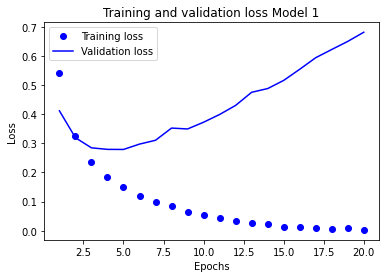

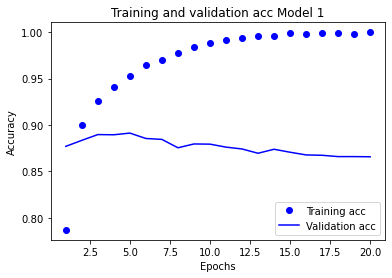

In [15]:
plot_loss(model_1_history, "Model 1")
plot_accuracy(model_1_history, "Model 1")

**Model Analysis:**

- The training loss steadily decreases over the course of training, indicating that the model is effectively learning and improving its performance as it processes more data.
- The validation loss decreases initially, reaching its lowest point at the fourth epoch, but then starts to increase, indicating that the model begins to overfit by the fourth epoch.
- The training accuracy shows a consistent upward trend as the model continues to train, suggesting that it is learning and improving its performance with each epoch.
- The validation accuracy reaches its highest point during the second epoch before gradually declining as the training progresses. This decline in validation accuracy indicates that the model's performance on unseen data begins to diminish after epoch 2
- This initial model is decent and can serve as a benchmark for comparing with other models.

In [16]:
print(np.argmin(model_1_history['val_loss']), "epochs")

4 epochs


### 2.F.b Model two  <a class="anchor" id="m-2"></a>

**Strategy:** I opted to expedite the overfitting process by introducing an additional layer with 128 hidden units in each layer. This adjustment is anticipated to accelerate the validation loss reduction compared to our previous model, facilitating a more rapid convergence during training. Moreover, I made the deliberate choice to employ the hyperbolic tangent (tanh) activation function instead of rectified linear unit (ReLU), aiming to explore its potential impact on the model's performance. Additionally, I decided to experiment with the mean squared error (MSE) loss function, commonly utilized in regression tasks, to evaluate its effectiveness in the context of our classification problem. These modifications were made with the intention of gaining insights into the interplay between model architecture, activation functions, and loss functions, ultimately aiming to enhance the model's predictive capabilities.

**Hyperparameters:**
- Number of layers: 4
- Last Layer activation function: `sigmoid`
- Optimzer: `rmsprop`
- Loss function: `mse`
- Hidden units: 128 each,
- Previous layers activation function: `tanh`
- Epochs: 20

[Neural network code](#8I)

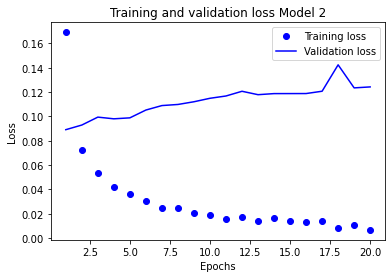

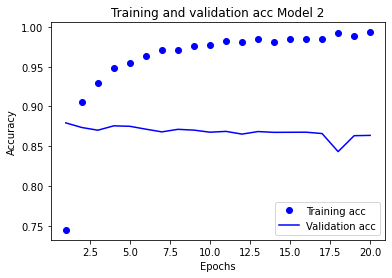

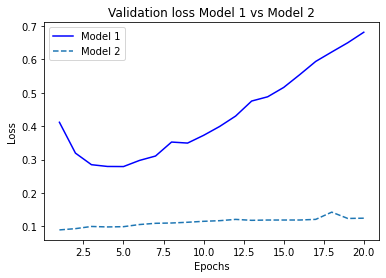

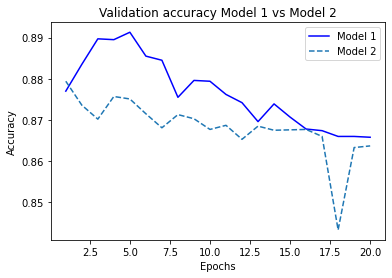

In [19]:
plot_loss(model_2_history, "Model 2")
plot_accuracy(model_2_history, "Model 2")
plot_loss_vs(model_1_history, model_2_history, "Model 1", "Model 2")
plot_acc_vs(model_1_history, model_2_history, "Model 1", "Model 2")

**Model Analysis:**

- The training loss steadily decreases over the course of training, indicating that the model is effectively learning and improving its performance as it processes more data.
- The validation loss slightly increases over time, never decreasing, indicating that the training algorithm stores an excessive amount of information about the training data, which hinders its ability to generalize effectively.
- The training accuracy shows a consistent upward trend as the model continues to train, suggesting that it is learning and improving its performance with each epoch.
- The validation accuracy plateaus, suggesting that the model has memorized the training data and maintains consistent accuracy across epochs.
- Compared to the first model, this second model is not a suitable option for classifying our reviews.

In [24]:
print(np.argmin(model_2_history['val_loss']), "epochs")

0 epochs


### 2.F.c Model three  <a class="anchor" id="m-3"></a>

**Strategy:** I streamlined the neural network architecture by reducing the number of layers and hidden units to just four. This deliberate simplification is aimed at inducing underfitting during the training phase by limiting the computational complexity of the model. Additionally, I reverted to using the ReLU activation function for the first layer, intending to observe its performance. However, I decided to explore the ELU activation function for this particular case to compare its effects. Unlike ReLU, ELU does not squash negative values to zero but instead maps them to positive values, potentially allowing for a richer representation of the data. It's worth noting that ELU is computationally more expensive due to its utilization of exponential calculations, which can increase the computational overhead.  I reverted the loss function back to `binary_crossentropy`. This adjustment aims to evaluate the impact of activation functions on the model's performance and computational efficiency, providing insights into their respective advantages and limitations.

**Hyperparameters:**
- Number of layers: 2
- Last Layer activation function: `elu`
- Optimzer: `rmsprop`
- Loss function: `binary_crossentropy`
- Hidden units: 4 each,
- Previous layers activation function: `relu`
- Epochs: 20

[Neural network code](#8J)

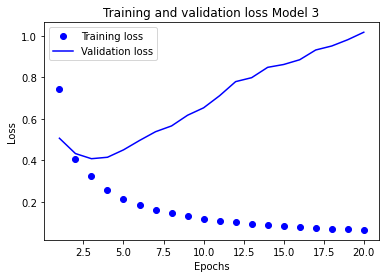

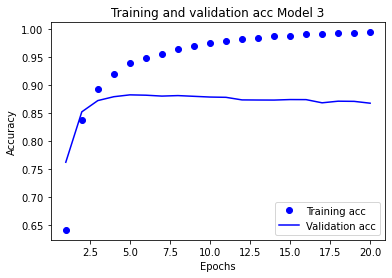

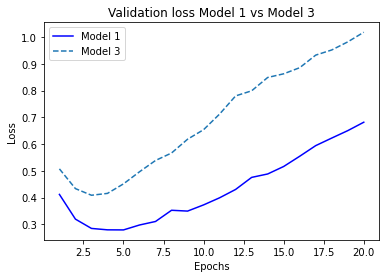

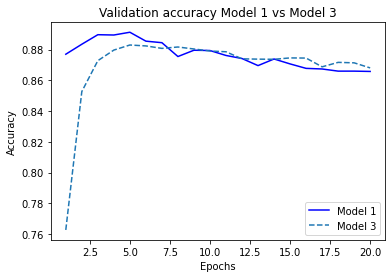

In [22]:
plot_loss(model_3_history, "Model 3")
plot_accuracy(model_3_history, "Model 3")
plot_loss_vs(model_1_history, model_3_history, "Model 1", "Model 3")
plot_acc_vs(model_1_history, model_3_history, "Model 1", "Model 3")

**Model Analysis:**

- The training loss steadily decreases over the course of training, indicating that the model is effectively learning and improving its performance as it processes more data.
- The validation loss decreases initially, reaching its lowest point at the second epoch, but then starts to increase, indicating that the model begins to overfit by the second epoch. 
- The training accuracy shows a consistent upward trend as the model continues to train, suggesting that it is learning and improving its performance with each epoch.
- The validation accuracy plateaus, indicating that the model lacks the necessary complexity to effectively learn from the training data, resulting in consistent but potentially suboptimal accuracy across epochs.
- The validation loss increases significantly faster than in model one, which is likely due to the reduction in the number of layers and hidden units in this model.
- The model one achieves betters score in terms of validation loss and accuracy, therefore this model is not a suitable option for classifying our reviews.

In [23]:
print(np.argmin(model_3_history['val_loss']), "epochs")

2 epochs


### 2.F.d Model four  <a class="anchor" id="m-4"></a>

**Strategy:** In crafting the final model, I sought to maintain a semblance of continuity with the initial setup while also exploring avenues for improvement. By reducing the number of hidden units to 8, I aimed to streamline the model's complexity while still retaining its capacity to learn relevant patterns from the data. Additionally, the inclusion of a learning rate parameter in the optimizer allowed for more precise control over the training process, potentially optimizing the model's performance by adjusting the step size during gradient descent. This strategic adjustment was motivated by a desire to strike a balance between model complexity and generalization, ultimately aiming for a robust and effective solution to the problem at hand.

**Hyperparameters:**
- Number of layers: 3
- Last Layer activation function: `sigmoid`
- Optimzer: `optimizer=optimizers.RMSprop(lr=0.001, momentum=0.0)`
- Loss function: `binary_crossentropy`
- Hidden units: 8 each,
- Previous layers activation function: `relu`
- Epochs: 20


[Neural network code](#8K)

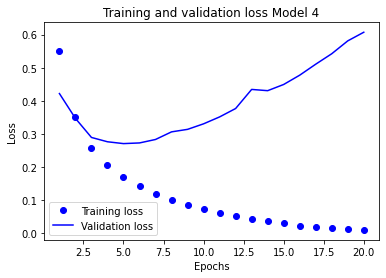

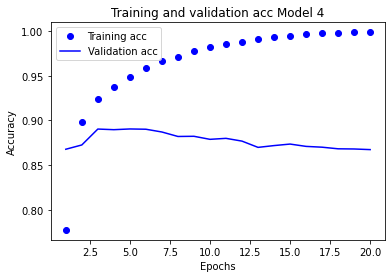

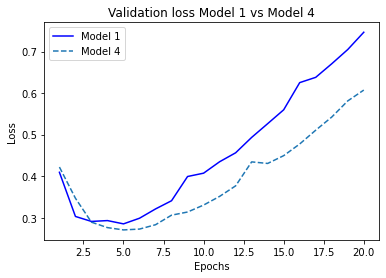

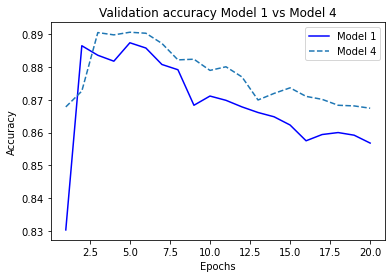

In [54]:
plot_loss(model_4_history, "Model 4")
plot_accuracy(model_4_history, "Model 4")
plot_loss_vs(model_1_history, model_4_history, "Model 1", "Model 4")
plot_acc_vs(model_1_history, model_4_history, "Model 1", "Model 4")

**Model Analysis:**

- The training loss steadily decreases over the course of training, indicating that the model is effectively learning and improving its performance as it processes more data.
- The validation loss decreases initially, reaching its lowest point at the fourth epoch, but then starts to increase, indicating that the model begins to overfit by the fourth epoch. 
- The training accuracy shows a consistent upward trend as the model continues to train, suggesting that it is learning and improving its performance with each epoch.
- The validation accuracy peaks between the second and fourth epoch before gradually decreasing
- Both the validation loss and accuracy outperform those of Model 1, making this model a favorable choice for classifying our reviews.

In [61]:
print(np.argmin(model_4_history['val_loss']), "epochs")

4 epochs


### 2.G Regularizing Your Model and Tuning Hyperparameters <a class="anchor" id="wf-7"></a>

After evaluating the training processes discussed in section 2.E, models 1 and 4 demonstrated superior performance compared to models 2 and 3. To further enhance these models, we will explore regularization techniques to potentially improve their performance. The following are the regularization methods to be explored:

1. Implement L2 regularization in model 1.
2. Implement Dropout in model 4.
3. Implement Dropout in model 1.

We will maintain the same layout and methodology as described in the previous section for consistency and ease of comparison.

### 2.G.a Model five <a class="anchor" id="m-5"></a>

**Strategy:** In our investigation with the first model, we aim to ascertain whether the addition of a penalty term to the loss function will effectively decrease the `validation_loss` while maintaining a consistent `validation_accuracy`. This regularization technique, known as L2 regularization. By applying this method, we anticipate observing a reduction in overfitting and improved performance on the validation set. 


**Hyperparameters:**
- L2 regularization `kernel_regularizer=regularizers.l2(0.001)`
- Number of layers: 3
- Last Layer activation function: `sigmoid`
- Optimzer: `rmsprop`
- Loss function: `binary_crossentropy`
- Hidden units: 16 each,
- Previous layers activation function: `relu`
- Epochs: 20


[Neural network code](#8L)

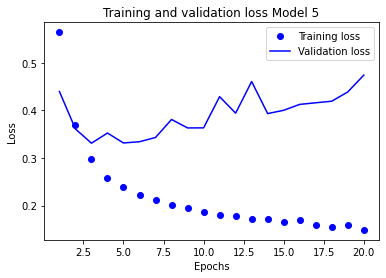

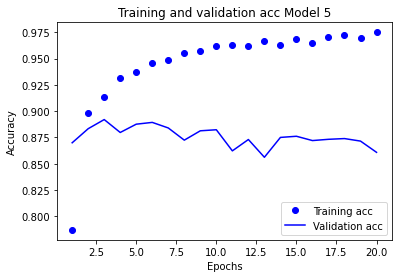

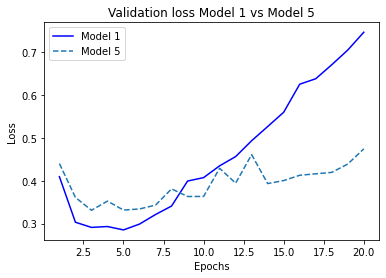

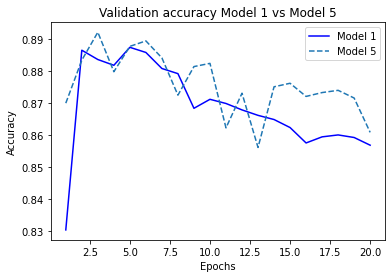

In [51]:
plot_loss(model_5_history, "Model 5")
plot_accuracy(model_5_history, "Model 5")
plot_loss_vs(model_1_history, model_5_history, "Model 1", "Model 5")
plot_acc_vs(model_1_history, model_5_history,"Model 1", "Model 5")

**Model Analysis:**

- The training loss steadily decreases over the course of training, indicating that the model is effectively learning and improving its performance as it processes more data.
- The validation loss decreases initially, reaching its lowest point at the second epoch, but then starts to increase, indicating that the model begins to overfit by the second epoch.
- The training accuracy shows a consistent upward trend as the model continues to train, suggesting that it is learning and improving its performance with each epoch.
- The validation accuracy reaches its highest point during the second epoch before gradually declining as the training progresses. This decline in validation accuracy indicates that the model's performance on unseen data begins to diminish after epoch 2
- The regularization method effectively mitigates the increase in validation loss observed in the initial model, ensuring that the updated validation loss remains either lower or equal to that of the previous model.
- However, it's important to note that the new validation loss should ideally be lower or at least equal to that of the previous model
- The validation accuracy appears to be higher than the previous model at epoch two, but there are several peaks observed, likely due to information loss from the regulization.


In [37]:
print(np.argmin(model_5_history['val_loss']), "epochs")

2 epochs


### 2.G.b Model 6 <a class="anchor" id="m-6"></a>

**Strategy:** For the second model, our objective is to evaluate whether incorporating a Dropout regularization technique will lead to a decrease in the `validation_loss` while ensuring a stable `validation_accuracy`. Dropout involves randomly setting a fraction of input units to zero during training, which is believed to enhance generalization by introducing randomness. We anticipate that implementing this method will result in reduced overfitting and enhanced performance on the validation set.


**Hyperparameters:**
- Dropout `model.add(layers.Dropout(0.5))`
- Number of layers: 3
- Last Layer activation function: `sigmoid`
- Optimzer: `optimizer=optimizers.RMSprop(lr=0.001, momentum=0.0)`
- Loss function: `binary_crossentropy`
- Hidden units: 8 each,
- Previous layers activation function: `relu`
- Epochs: 20


[Neural network code](#8M)

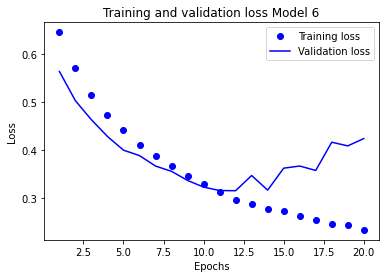

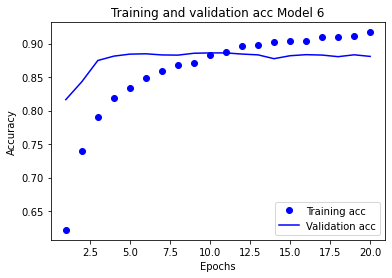

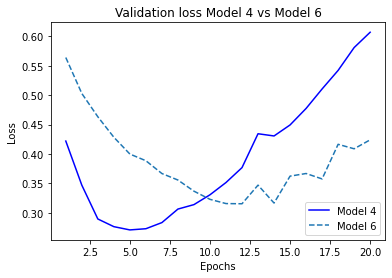

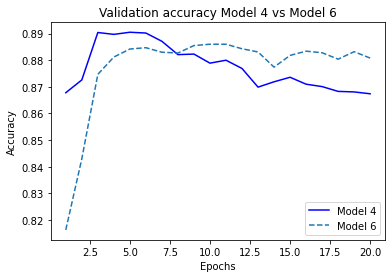

In [52]:
plot_loss(model_6_history, "Model 6")
plot_accuracy(model_6_history, "Model 6")
plot_loss_vs(model_4_history, model_6_history, "Model 4" , "Model 6")
plot_acc_vs(model_4_history, model_6_history, "Model 4" , "Model 6")

**Model Analysis:**

- The training loss steadily decreases over the course of training, indicating that the model is effectively learning and improving its performance as it processes more data.
- The validation loss decreases initially, reaching its lowest point at the eleventh epoch, but then starts to increase, indicating that the model begins to overfit by the eleventh epoch.
- The training accuracy shows a consistent upward trend as the model continues to train, suggesting that it is learning and improving its performance with each epoch.
- The validation accuracy peaks during the second epoch and then plateaus for the remaining epochs. This behavior is a consequence of dropout, which randomly omits information during training, potentially leading to a lack of learning about certain aspects of the data.
- The regularization method prolongs the training process, requiring more epochs to decrease the validation loss. However, despite the extended training, this model fails to achieve a lower score than the original model.
- The validation accuracy obtained in this model is not superior than the previous model.

In [40]:
print(np.argmin(model_6_history['val_loss']), "epochs")

11 epochs


### 2.G.c Model 7 <a class="anchor" id="m-7"></a>

**Strategy:** For the final model, I'll implement Dropout regularization, similar to the approach used in the second model, on Model 1. The objective is to determine if this regularization technique can lead to improved accuracy and loss scores compared to the initial model.

**Hyperparameters:**
- Dropout `model.add(layers.Dropout(0.5))`
- Number of layers: 3
- Last Layer activation function: `sigmoid`
- Optimzer: `rmsprop`
- Loss function: `binary_crossentropy`
- Hidden units: 16 each,
- Previous layers activation function: `relu`
- Epochs: 20


[Neural network code](#8M)

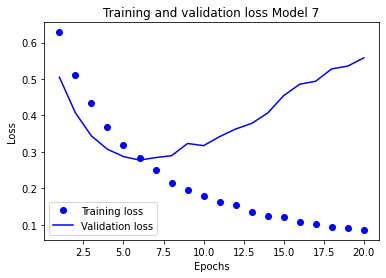

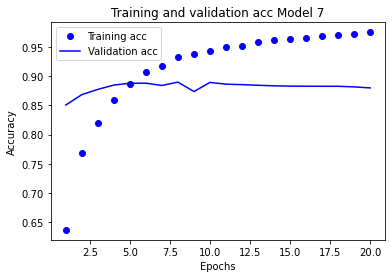

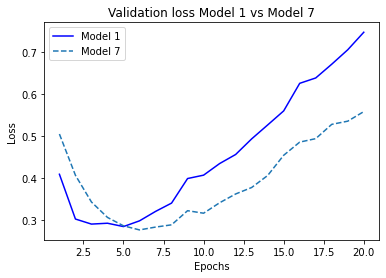

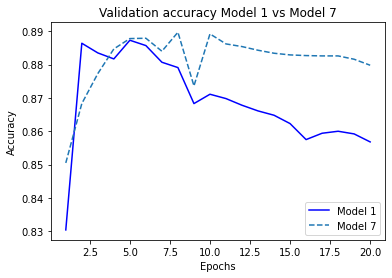

In [57]:
plot_loss(model_7_history, "Model 7")
plot_accuracy(model_7_history, "Model 7")
plot_loss_vs(model_1_history, model_7_history, "Model 1" , "Model 7")
plot_acc_vs(model_1_history, model_7_history, "Model 1" , "Model 7")

**Model Analysis:**

- The training loss steadily decreases over the course of training, indicating that the model is effectively learning and improving its performance as it processes more data.
- The validation loss decreases initially, reaching its lowest point at the fifth epoch, but then starts to increase, indicating that the model begins to overfit by the fifth epoch.
- The training accuracy shows a consistent upward trend as the model continues to train, suggesting that it is learning and improving its performance with each epoch.
- The validation accuracy peaks during the fifth epoch and then plateaus for the remaining epochs. This behavior is a consequence of dropout, which randomly omits information during training, potentially leading to a lack of learning about certain aspects of the data.
- The regularization method prolongs the training process, requiring more epochs to decrease the validation loss.
- The new model achieves a lower validation loss score than the previous model.
- The new model achieves a higher validation accuracy score than the previous model.

In [59]:
print(np.argmin(model_7_history['val_loss']), "epochs")

5 epochs


## 3. Comparison between the top two models <a class="anchor" id="3"></a>

After analyzing the seven models presented in this report, I have identified models 4 and 7 as the ones with the lowest validation loss and highest validation accuracy. Therefore, these two models will be used to build the potential production neural networks. First, let's closely compare the validation performance of both models. We observe that the validation results are quite promising for both, with model 4 slightly outperforming model 7 in terms of validation loss. Additionally, there is a slight advantage in accuracy for model 4 compared to model 7. It's worth noting that model 4 does not incorporate any regularization techniques, unlike model 7.

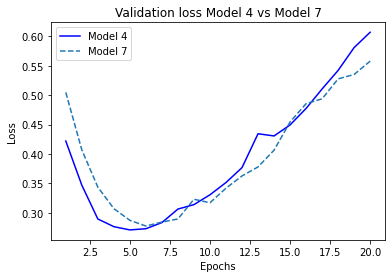

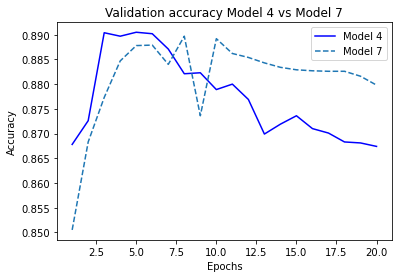

In [60]:
plot_loss_vs(model_4_history, model_7_history, "Model 4", "Model 7")
plot_acc_vs(model_4_history, model_7_history, "Model 4", "Model 7")

### 3.A. Neural Network from Model 4 <a class="anchor" id="3A"></a>

In [62]:
model = models.Sequential()
model.add(layers.Dense(8, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(8, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001, momentum=0.0),
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train,
                    epochs = 4,
                    batch_size = 512) 

Epoch 1/4
49/49 [==============================] - 12s 235ms/step - loss: 0.5172 - accuracy: 0.8134
Epoch 2/4
49/49 [==============================] - 10s 198ms/step - loss: 0.3180 - accuracy: 0.8981
Epoch 3/4
49/49 [==============================] - 8s 161ms/step - loss: 0.2383 - accuracy: 0.9190
Epoch 4/4
49/49 [==============================] - 5s 106ms/step - loss: 0.1966 - accuracy: 0.9318


In [63]:
# evaluate on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)

782/782 [==============================] - 10s 13ms/step - loss: 0.2851 - accuracy: 0.8860


### 3.B. Neural Network from Model 7 <a class="anchor" id="3B"></a>

In [6]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train,
                    epochs = 5,
                    batch_size = 512) 

Epoch 1/5
49/49 [==============================] - 12s 253ms/step - loss: 0.6078 - accuracy: 0.6693
Epoch 2/5
49/49 [==============================] - 13s 259ms/step - loss: 0.4577 - accuracy: 0.8128
Epoch 3/5
49/49 [==============================] - 26s 520ms/step - loss: 0.3697 - accuracy: 0.8661
Epoch 4/5
49/49 [==============================] - 26s 525ms/step - loss: 0.3073 - accuracy: 0.8950
Epoch 5/5
49/49 [==============================] - 17s 345ms/step - loss: 0.2662 - accuracy: 0.9139


In [7]:
# evaluate on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)

782/782 [==============================] - 10s 13ms/step - loss: 0.2846 - accuracy: 0.8864


## 4. Results <a class="anchor" id="4"></a> 

- Both Model 4 and Model 7 show improvements in loss compared to the baseline, with Model 7 achieving the lowest loss of 0.2846 and Model 4 close behind at 0.2851, while the baseline had a loss of 0.3652.
- Model 7 achieves the highest accuracy of 0.8864, followed closely by Model 4 with an accuracy of 0.8860, both surpassing the baseline accuracy of 0.8762.
- Model 4 utilizes half the size of hidden units compared to Model 7, while Model 7 incorporates a dropout rate of 0.5.
- Despite architectural differences, both models exhibit similar performance, likely attributed to their configurations.
- Both Model 4 and Model 7 achieve a loss score below 0.29, indicating strong generalization ability and robust performance beyond the training data.
- Both models demonstrate good predictive capability for reviews, indicating their suitability for deployment as production models.


|          | Baseline | Model 4 | Model 7 |
| -------- | -------- | ------- | ------- |
| Loss     | 0.3652   | 0.2851  | 0.2846  |
| Accuracy | 0.8762   | 0.8860  | 0.8864  |


## 5. Evaluation <a class="anchor" id="5"></a>

The chosen models, Model 4 and Model 7, exhibit several strengths that make them suitable for deployment as production models. One notable strength is their impressive performance in terms of accuracy and loss metrics, with both models achieving accuracy scores above 0.88 and loss values below 0.29. This indicates that the models are capable of making accurate predictions while effectively generalizing to unseen data, which is crucial for real-world applications. Additionally, both models demonstrate improvements over the baseline model, showcasing their ability to learn complex patterns from the data and make more accurate predictions. Furthermore, the architectural differences between the models, such as the use of different hidden unit sizes and dropout rates, provide flexibility in selecting the most suitable model based on specific requirements or constraints.

Despite their strengths, the chosen models also have some weaknesses that need to be considered. One potential weakness is the limited interpretability of the models, particularly in understanding how they arrive at their predictions. This lack of interpretability may pose challenges in scenarios where transparency and explainability are essential, such as in regulated industries or applications where decision-making needs to be justified. Additionally, while the chosen models demonstrate strong performance on the validation set, further evaluation on a separate test set or in real-world scenarios is necessary to assess their robustness and generalization capabilities fully. Furthermore, the computational resources required to train and deploy these models, especially considering their complex architectures and potential hyperparameter tuning, could be a limiting factor for organizations with limited resources.

## 6. Conclusion <a class="anchor" id="6"></a>

In conclusion, this report has provided a comprehensive overview of constructing a Neural Network using Deep Learning techniques applied to the IMDB dataset of movie reviews. Following the methodology outlined in "Deep Learning with Python," we navigated through the process of algorithm creation, optimization techniques, and exploration of hyperparameters to develop models with the highest accuracy and lowest loss values. Through a detailed analysis of the best two models, we identified their strengths, such as their ability to generalize well and achieve impressive performance metrics, including high accuracy scores and low loss values. Additionally, by successfully solving a binary classification problem, we have demonstrated the efficacy of the models developed in this study. However, it's essential to acknowledge the weaknesses inherent in this workflow, including limited model interpretability and the need for further evaluation to assess real-world applicability and robustness. Overall, this report serves as a valuable resource for understanding the intricacies of constructing and optimizing Neural Networks for sentiment analysis tasks using the IMDB dataset.

## 7. References <a class="anchor" id="7"></a>

The foundation of the code presented in this report, as well as the core concepts discussed, draws heavily from the resources provided by "Deep Learning with Python" (DLWP) and the comprehensive lectures offered within the course curriculum.

François Chollet. (2017). Deep Learning with Python. Manning Publications. *First Edition*

## 8. Modular code <a class="anchor" id="8"></a>

### 8.A. Imports <a class="anchor" id="8A"></a>

In [27]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import numpy as np

### 8.B. Decode a review <a class="anchor" id="8B"></a>

In [5]:
# Load the word index mapping
word_index = imdb.get_word_index()

# Reverse the word index mapping to map integers to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decode a review from its list of word indices to text
def decode_review(review):
    # Decodes the review using the reverse word index mapping
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in review])

1646592/1641221 [==============================] - 0s 0us/step


### 8.C. Vectorize Sequences <a class="anchor" id="8C"></a>

In [28]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros( (len(sequences), dimension) )
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

### 8.D. Plot Training and validation loss <a class="anchor" id="8D"></a>

In [11]:
def plot_loss(history_dict, model_name):
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')           
    plt.plot(epochs, val_loss, 'b', label='Validation loss')      
    plt.title(f"Training and validation loss {model_name}")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

### 8.E. Plot training and validation accuracy <a class="anchor" id="8E"></a>

In [12]:
def plot_accuracy(history_dict, model_name):
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')           
    plt.plot(epochs, val_acc, 'b', label='Validation acc')    
    plt.title(f"Training and validation acc {model_name}")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

### 8.F. Plot validation loss A vs B <a class="anchor" id="8F"></a>

In [13]:
def plot_loss_vs(history_dict1, history_dict2, model_name1, model_name2):
    loss1 = history_dict1['val_loss']
    loss2 = history_dict2['val_loss']

    epochs = range(1, len(loss1) + 1)

    plt.plot(epochs, loss1, 'b', label=model_name1)           
    plt.plot(epochs, loss2, '--', label=model_name2)    
    plt.title(f"Validation loss {model_name1} vs {model_name2}")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

### 8.G. Plot validation accuracy A vs B <a class="anchor" id="8G"></a>

In [14]:
def plot_acc_vs(history_dict1, history_dict2, model_name1, model_name2):
    acc1 = history_dict1['val_accuracy']
    acc2 = history_dict2['val_accuracy']

    epochs = range(1, len(acc1) + 1)

    plt.plot(epochs, acc1, 'b', label= model_name1)           
    plt.plot(epochs, acc2, '--', label=model_name2)    
    plt.title(f"Validation accuracy {model_name1} vs {model_name2}")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

### 8.H. Model one code  <a class="anchor" id="8H"></a>

In [8]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# shuffle
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]

# train
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Epoch 1/20
30/30 [==============================] - 8s 270ms/step - loss: 0.5414 - accuracy: 0.7871 - val_loss: 0.4117 - val_accuracy: 0.8770
Epoch 2/20
30/30 [==============================] - 5s 164ms/step - loss: 0.3263 - accuracy: 0.8999 - val_loss: 0.3193 - val_accuracy: 0.8835
Epoch 3/20
30/30 [==============================] - 5s 157ms/step - loss: 0.2348 - accuracy: 0.9257 - val_loss: 0.2846 - val_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 4s 150ms/step - loss: 0.1860 - accuracy: 0.9414 - val_loss: 0.2793 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 5s 177ms/step - loss: 0.1485 - accuracy: 0.9525 - val_loss: 0.2790 - val_accuracy: 0.8913
Epoch 6/20
30/30 [==============================] - 5s 160ms/step - loss: 0.1195 - accuracy: 0.9646 - val_loss: 0.2973 - val_accuracy: 0.8855
Epoch 7/20
30/30 [==============================] - 5s 157ms/step - loss: 0.1000 - accuracy: 0.9700 - val_loss: 0.3105 - val_accuracy: 0.8845
Epoch 

In [9]:
model_1_history = history.history
model_1_history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 8.I. Model two code  <a class="anchor" id="8I"></a>

In [17]:
model = models.Sequential()
model.add(layers.Dense(128, activation = 'tanh', input_shape = (10000,)))
model.add(layers.Dense(128, activation = 'tanh', input_shape = (10000,)))
model.add(layers.Dense(128, activation = 'tanh', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])

# shuffle
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]

# train
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Epoch 1/20
30/30 [==============================] - 16s 540ms/step - loss: 0.1691 - accuracy: 0.7449 - val_loss: 0.0891 - val_accuracy: 0.8794
Epoch 2/20
30/30 [==============================] - 16s 530ms/step - loss: 0.0723 - accuracy: 0.9055 - val_loss: 0.0929 - val_accuracy: 0.8736
Epoch 3/20
30/30 [==============================] - 15s 483ms/step - loss: 0.0537 - accuracy: 0.9293 - val_loss: 0.0994 - val_accuracy: 0.8702
Epoch 4/20
30/30 [==============================] - 14s 463ms/step - loss: 0.0419 - accuracy: 0.9483 - val_loss: 0.0980 - val_accuracy: 0.8757
Epoch 5/20
30/30 [==============================] - 14s 480ms/step - loss: 0.0365 - accuracy: 0.9543 - val_loss: 0.0988 - val_accuracy: 0.8751
Epoch 6/20
30/30 [==============================] - 15s 517ms/step - loss: 0.0301 - accuracy: 0.9631 - val_loss: 0.1052 - val_accuracy: 0.8715
Epoch 7/20
30/30 [==============================] - 14s 457ms/step - loss: 0.0247 - accuracy: 0.9709 - val_loss: 0.1089 - val_accuracy: 0.8681

In [18]:
model_2_history = history.history
model_2_history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 8.J. Model three code  <a class="anchor" id="8J"></a>

In [20]:
model = models.Sequential()
model.add(layers.Dense(4, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'elu'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# shuffle
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]

# train
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Epoch 1/20
30/30 [==============================] - 9s 297ms/step - loss: 0.7439 - accuracy: 0.6419 - val_loss: 0.5071 - val_accuracy: 0.7627
Epoch 2/20
30/30 [==============================] - 9s 307ms/step - loss: 0.4073 - accuracy: 0.8378 - val_loss: 0.4333 - val_accuracy: 0.8527
Epoch 3/20
30/30 [==============================] - 9s 293ms/step - loss: 0.3245 - accuracy: 0.8932 - val_loss: 0.4085 - val_accuracy: 0.8728
Epoch 4/20
30/30 [==============================] - 7s 244ms/step - loss: 0.2575 - accuracy: 0.9200 - val_loss: 0.4155 - val_accuracy: 0.8797
Epoch 5/20
30/30 [==============================] - 7s 243ms/step - loss: 0.2140 - accuracy: 0.9401 - val_loss: 0.4511 - val_accuracy: 0.8830
Epoch 6/20
30/30 [==============================] - 8s 263ms/step - loss: 0.1850 - accuracy: 0.9480 - val_loss: 0.4963 - val_accuracy: 0.8824
Epoch 7/20
30/30 [==============================] - 9s 290ms/step - loss: 0.1615 - accuracy: 0.9559 - val_loss: 0.5386 - val_accuracy: 0.8808
Epoch 

In [21]:
model_3_history = history.history
model_3_history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 8.K. Model four code  <a class="anchor" id="8K"></a>

In [25]:
model = models.Sequential()
model.add(layers.Dense(8, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(8, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001, momentum=0.0),
             loss='binary_crossentropy',
             metrics=['accuracy'])

# shuffle
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]

# train
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Epoch 1/20
30/30 [==============================] - 8s 263ms/step - loss: 0.5460 - accuracy: 0.7779 - val_loss: 0.4452 - val_accuracy: 0.8655
Epoch 2/20
30/30 [==============================] - 7s 217ms/step - loss: 0.3673 - accuracy: 0.8944 - val_loss: 0.3558 - val_accuracy: 0.8733
Epoch 3/20
30/30 [==============================] - 7s 220ms/step - loss: 0.2756 - accuracy: 0.9174 - val_loss: 0.3057 - val_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 6s 207ms/step - loss: 0.2217 - accuracy: 0.9323 - val_loss: 0.2901 - val_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 6s 203ms/step - loss: 0.1833 - accuracy: 0.9443 - val_loss: 0.2840 - val_accuracy: 0.8900
Epoch 6/20
30/30 [==============================] - 6s 213ms/step - loss: 0.1567 - accuracy: 0.9527 - val_loss: 0.2810 - val_accuracy: 0.8912
Epoch 7/20
30/30 [==============================] - 6s 187ms/step - loss: 0.1351 - accuracy: 0.9601 - val_loss: 0.2876 - val_accuracy: 0.8901
Epoch 

In [26]:
model_4_history = history.history
model_4_history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 8.L Model five code  <a class="anchor" id="8L"></a>

In [29]:
model = models.Sequential()
model.add(layers.Dense(16,  kernel_regularizer=regularizers.l2(0.001), activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16,  kernel_regularizer=regularizers.l2(0.001),  activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# shuffle
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]

# train
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Epoch 1/20
30/30 [==============================] - 17s 573ms/step - loss: 0.5478 - accuracy: 0.7933 - val_loss: 0.4169 - val_accuracy: 0.8789
Epoch 2/20
30/30 [==============================] - 10s 320ms/step - loss: 0.3548 - accuracy: 0.8997 - val_loss: 0.3486 - val_accuracy: 0.8891
Epoch 3/20
30/30 [==============================] - 7s 243ms/step - loss: 0.2890 - accuracy: 0.9212 - val_loss: 0.3266 - val_accuracy: 0.8912
Epoch 4/20
30/30 [==============================] - 8s 264ms/step - loss: 0.2509 - accuracy: 0.9348 - val_loss: 0.3245 - val_accuracy: 0.8902
Epoch 5/20
30/30 [==============================] - 8s 250ms/step - loss: 0.2351 - accuracy: 0.9395 - val_loss: 0.3336 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 7s 237ms/step - loss: 0.2215 - accuracy: 0.9451 - val_loss: 0.3330 - val_accuracy: 0.8878
Epoch 7/20
30/30 [==============================] - 8s 273ms/step - loss: 0.2067 - accuracy: 0.9512 - val_loss: 0.3396 - val_accuracy: 0.8866
Epoc

In [30]:
model_5_history = history.history
model_5_history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 8.M. Model six code  <a class="anchor" id="8M"></a>

In [31]:
model = models.Sequential()
model.add(layers.Dense(8, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(8, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001, momentum=0.0),
             loss='binary_crossentropy',
             metrics=['accuracy'])

# shuffle
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]

# train
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Epoch 1/20
30/30 [==============================] - 10s 337ms/step - loss: 0.6459 - accuracy: 0.5849 - val_loss: 0.5645 - val_accuracy: 0.8252
Epoch 2/20
30/30 [==============================] - 9s 290ms/step - loss: 0.5766 - accuracy: 0.6581 - val_loss: 0.4950 - val_accuracy: 0.8666
Epoch 3/20
30/30 [==============================] - 9s 290ms/step - loss: 0.5307 - accuracy: 0.7105 - val_loss: 0.4391 - val_accuracy: 0.8787
Epoch 4/20
30/30 [==============================] - 7s 240ms/step - loss: 0.4912 - accuracy: 0.7407 - val_loss: 0.3932 - val_accuracy: 0.8847
Epoch 5/20
30/30 [==============================] - 7s 223ms/step - loss: 0.4724 - accuracy: 0.7602 - val_loss: 0.3604 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 8s 260ms/step - loss: 0.4444 - accuracy: 0.7779 - val_loss: 0.3385 - val_accuracy: 0.8914
Epoch 7/20
30/30 [==============================] - 7s 237ms/step - loss: 0.4275 - accuracy: 0.7911 - val_loss: 0.3258 - val_accuracy: 0.8866
Epoch

In [32]:
model_6_history = history.history
model_6_history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 8.N Model seven code  <a class="anchor" id="8N"></a>

In [55]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# shuffle
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]

# train
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Epoch 1/20
30/30 [==============================] - 11s 360ms/step - loss: 0.6284 - accuracy: 0.6370 - val_loss: 0.5049 - val_accuracy: 0.8505
Epoch 2/20
30/30 [==============================] - 6s 213ms/step - loss: 0.5118 - accuracy: 0.7684 - val_loss: 0.4070 - val_accuracy: 0.8683
Epoch 3/20
30/30 [==============================] - 7s 233ms/step - loss: 0.4341 - accuracy: 0.8199 - val_loss: 0.3436 - val_accuracy: 0.8773
Epoch 4/20
30/30 [==============================] - 7s 227ms/step - loss: 0.3686 - accuracy: 0.8588 - val_loss: 0.3071 - val_accuracy: 0.8847
Epoch 5/20
30/30 [==============================] - 6s 210ms/step - loss: 0.3182 - accuracy: 0.8873 - val_loss: 0.2872 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 7s 220ms/step - loss: 0.2828 - accuracy: 0.9066 - val_loss: 0.2775 - val_accuracy: 0.8879
Epoch 7/20
30/30 [==============================] - 7s 227ms/step - loss: 0.2496 - accuracy: 0.9167 - val_loss: 0.2842 - val_accuracy: 0.8840
Epoch

In [56]:
model_7_history = history.history
model_7_history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])